## Libraries

In [114]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [115]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [116]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [117]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
faultDetectionMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'FaultDetection'].values
faultDetectionINCLING = df.loc[df['Generator'] == 'INCLING', 'FaultDetection'].values
# Test the difference between the generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionACTS, faultDetectionMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(faultDetectionACTS, faultDetectionINCLING, "ACTS vs INCLING")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")
test(faultDetectionBDD, faultDetectionMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(faultDetectionBDD, faultDetectionINCLING, "BDD vs INCLING")
test(faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")
test(faultDetectionSPEC, faultDetectionINCLING, "SPECIFICITY vs INCLING")
test(faultDetectionMUTTESTGENERATOR, faultDetectionINCLING, "MUTTESTGENERATOR vs INCLING")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=234.5, pvalue=0.7912948251279108)
0.7405413860243902
0.7401808887439025
Effect size: -0.020664099073296183
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=200.0, pvalue=0.9455231238699077)
0.7405413860243902
0.7401875478170733
Effect size: -0.005335658869944315
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=185.5, pvalue=0.9329554902322205)
0.7405413860243902
0.7405433106219513
Effect size: -0.0065692118514827195
*** Test on ACTS vs INCLING ***
WilcoxonResult(statistic=209.5, pvalue=0.636090540132071)
0.7405413860243902
0.7401207042682927
Effect size: -0.03694851821157274
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=238.0, pvalue=0.447560194375875)
0.7401875478170733
0.7401808887439025
Effect size: -0.059306113724028005
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=277.0, pvalue=0.9501239434499456)
0.7401875478170733
0.7405433106219513
Effect size: -0.00488442286880231

### Specificity

In [118]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
specificityMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Specificity'].values
specificityINCLING = df.loc[df['Generator'] == 'INCLING', 'Specificity'].values
# Test the difference between the generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityACTS, specificityMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(specificityACTS, specificityINCLING, "ACTS vs INCLING")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")
test(specificityBDD, specificityMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(specificityBDD, specificityINCLING, "BDD vs INCLING")
test(specificitySPEC, specificityMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")
test(specificitySPEC, specificityINCLING, "SPECIFICITY vs INCLING")
test(specificityMUTTESTGENERATOR, specificityINCLING, "MUTTESTGENERATOR vs INCLING")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=2.684275835835317e-05)
0.4820944640975609
0.531235755195122
Effect size: -0.3278649752551889
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=55.0, pvalue=0.020246245694770734)
0.4820944640975609
0.5007862639207317
Effect size: -0.18129844085935176
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=254.5, pvalue=0.46178950128527485)
0.4820944640975609
0.491289201097561
Effect size: -0.057464399474557275
*** Test on ACTS vs INCLING ***
WilcoxonResult(statistic=9.5, pvalue=0.004030631626533845)
0.4820944640975609
0.5038305215853658
Effect size: -0.22455869348519364
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=8.5, pvalue=0.00012738945536620196)
0.5007862639207317
0.531235755195122
Effect size: -0.2991861021081453
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=251.0, pvalue=0.4264007363422657)
0.5007862639207317
0.491289201097561
Effect size: -0.062107636092075175
*

In [119]:
specificTestsACTS = df.loc[df['Generator'] == 'ACTS', 'NSpecificTests'].values
specificTestsSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'NSpecificTests'].values
specificTestsBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'NSpecificTests'].values
specificTestsMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'NSpecificTests'].values
specificTestsINCLING = df.loc[df['Generator'] == 'INCLING', 'NSpecificTests'].values

### Time

In [120]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
timeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Time'].values
timeINCLING = df.loc[df['Generator'] == 'INCLING', 'Time'].values
# Test the difference between the generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeACTS, timeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(timeACTS, timeINCLING, "ACTS vs INCLING")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")
test(timeBDD, timeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(timeBDD, timeINCLING, "BDD vs INCLING")
test(timeSPEC, timeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")
test(timeSPEC, timeINCLING, "SPECIFICITY vs INCLING")
test(timeMUTTESTGENERATOR, timeINCLING, "MUTTESTGENERATOR vs INCLING")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=3.663275894851821e-15)
107.27926829268293
26.70731707317073
Effect size: -0.6142269474763654
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=3.663583406673553e-15)
107.27926829268293
42.48048780487805
Effect size: -0.6142261270385183
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.663583406673553e-15)
107.27926829268293
24.903658536585368
Effect size: -0.6142261270385183
*** Test on ACTS vs INCLING ***
WilcoxonResult(statistic=0.0, pvalue=3.662968407211321e-15)
107.27926829268293
8.16219512195122
Effect size: -0.6142277679175001
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=10.0, pvalue=5.293932466723316e-15)
42.48048780487805
26.70731707317073
Effect size: -0.6106178486232451
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.662046089359831e-15)
42.48048780487805
24.903658536585368
Effect size: -0.6142302292606302
*** Test

### Size

In [121]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
sizeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Size'].values
sizeINCLING = df.loc[df['Generator'] == 'INCLING', 'Size'].values
# Test the difference between the generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeACTS, sizeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(sizeACTS, sizeINCLING, "ACTS vs INCLING")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")
test(sizeBDD, sizeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(sizeBDD, sizeINCLING, "BDD vs INCLING")
test(sizeSPEC, sizeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")
test(sizeSPEC, sizeINCLING, "SPECIFICITY vs INCLING")
test(sizeMUTTESTGENERATOR, sizeINCLING, "MUTTESTGENERATOR vs INCLING")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=567.0, pvalue=0.367927520345806)
8.475609756097562
8.670731707317072
Effect size: -0.07030647732873654
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=651.5, pvalue=0.9140732954862807)
8.475609756097562
8.576829268292682
Effect size: -0.008425743929678159
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=713.0, pvalue=0.0011662052575471718)
8.475609756097562
7.097560975609756
Effect size: -0.25354960101138146
*** Test on ACTS vs INCLING ***
WilcoxonResult(statistic=177.0, pvalue=0.008714571081501227)
8.475609756097562
8.731707317073171
Effect size: -0.20482602857002305
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=356.5, pvalue=0.1585017435420295)
8.576829268292682
8.670731707317072
Effect size: -0.11011253621802918
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=758.0, pvalue=0.0028728450445477402)
8.576829268292682
7.097560975609756
Effect size: -0.2327790137244308
*** Tes

### Tuples Covered

In [122]:
tpACTS = df.loc[df['Generator'] == 'ACTS', 'CombinatorialCoverage'].values
tpSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'CombinatorialCoverage'].values
tpBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'CombinatorialCoverage'].values
tpMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'CombinatorialCoverage'].values
tpINCLING = df.loc[df['Generator'] == 'INCLING', 'CombinatorialCoverage'].values
# Test the difference between the two generators
test(tpACTS, tpMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(tpBDD, tpMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(tpSPEC, tpMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")
test(tpINCLING, tpMUTTESTGENERATOR, "INCLING vs MUTTESTGENERATOR")

*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835
*** Test on INCLING vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835


## Box-Plots

In [123]:
def box_plot(y1, y2, y3, y4, y5, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,2))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale, y4/scale, y5/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(5), labels=['ACTS', 'INCLING', 'BDDGEN', 'SPECGEN', 'MUTESTGEN'])
    plt.xlabel(ylabel)
    plt.savefig("imgs/" + ylabel + '.pdf', bbox_inches='tight')
    plt.show()

### Fault detection

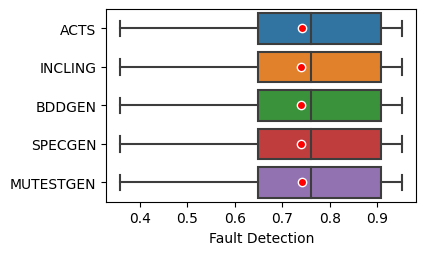

In [124]:
box_plot(faultDetectionACTS, faultDetectionINCLING, faultDetectionBDD, faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

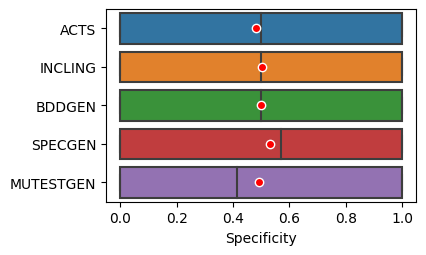

In [125]:
box_plot(specificityACTS, specificityINCLING, specificityBDD, specificitySPEC, specificityMUTTESTGENERATOR, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

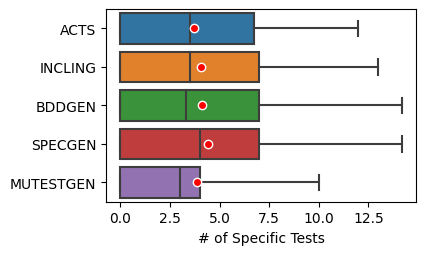

In [126]:
box_plot(specificTestsACTS, specificTestsINCLING, specificTestsBDD, specificTestsSPEC, specificTestsMUTTESTGENERATOR, '# of Specific Tests', xscale = 'linear', scale = 1, showfliers = False)

### Time

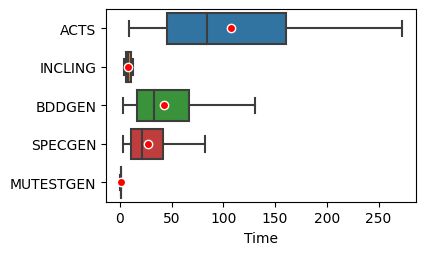

In [127]:
box_plot(timeACTS, timeINCLING, timeBDD, timeSPEC, faultDetectionMUTTESTGENERATOR, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

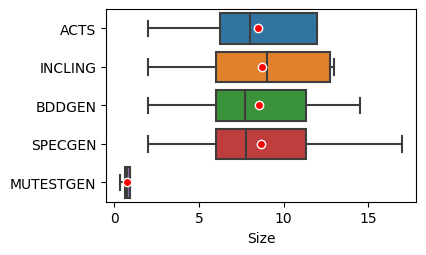

In [128]:
box_plot(sizeACTS, sizeINCLING, sizeBDD, sizeSPEC, faultDetectionMUTTESTGENERATOR, 'Size', xscale = 'linear', scale = 1, showfliers = False)

### Tuples Covered

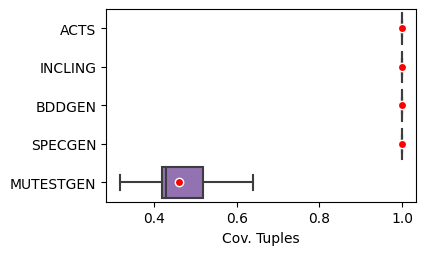

In [129]:
box_plot(tpACTS, tpINCLING, tpBDD, tpSPEC, tpMUTTESTGENERATOR, 'Cov. Tuples', xscale = 'linear', scale = 1, showfliers = False)